# Importing Libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

# Loading yaml

In [2]:
try:
    with open('../config.yaml', "r") as file:
        config = yaml.safe_load(file)
except Exception:
    print("Config file not found!!!")

# Creating function to apply Market Basket Analysis and Apriori Algorithm

In [3]:
def market_basket_analysis(df: pd.DataFrame, transactions: str, items: str, min_support=0.1, metric="lift", min_threshold=1) -> tuple:
    """
    Apply Market Basket Analysis using the Apriori algorithm to a dataframe with transactions and items sold.

    Args:
        df (pd.DataFrame): Input dataframe.
        transactions (str): Name of the first column for analysis, the one with the transactions values.
        items (str): Name of the second column for analysis, the one with the items values.
        min_support (float): Minimum support threshold for frequent itemsets.
        metric (str): Evaluation metric for association rules.
        min_threshold (float): Minimum threshold for the evaluation metric.

    Returns:
        tuple: Tuple containing DataFrame of association rules and DataFrame of frequent itemsets.

    """
    # Group the DataFrame by "transactions" and "item" and calculate the count of each transaction
    grouped_df = df.groupby([transactions, items]).size().reset_index(name="count")

    # Pivot the DataFrame to have "transactions" as index and "items" as columns and sum the counts
    pivot_df = grouped_df.pivot_table(index=transactions, columns=items, values="count", aggfunc="sum", fill_value=0)

    # Encode the values to 1 if greater than 0 and 0 if less than or equal to 0
    def encode_units(x):
        if x <= 0:
            return 0
        if x >= 1:
            return 1

    basket_sets = pivot_df.applymap(encode_units)

    # Apply the Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)

    # Add a column with the length of the itemsets
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    # Generate association rules based on frequent itemsets
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)

    # Sort the rules by lift
    rules = rules.sort_values(by='lift', ignore_index=True)

    return rules, frequent_itemsets

# Calling file

In [4]:
bakery_data = pd.read_csv(config['data']['output']['bakery_data'])
bakery_data.drop('Unnamed: 0', axis=1, inplace=True)

# Applying market_basket_analysis function to file

In [5]:
transactions = 'ticket_number'
items = 'article'

rules, frequent_itemsets = market_basket_analysis(bakery_data, 'ticket_number', 'article', min_support=0.004, metric="lift", min_threshold=3)

C:\Users\duart\ironhack.bootcamp\week_5\Mid_bootcamp_project\midcamp_env\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [6]:
# With a lower support, we can check more itemsets with higher lifts, which give us better and more interesting views about the Data

# Displaying frequent_itemsets

In [7]:
display(frequent_itemsets)

,support,itemsets,length
0,0.112740,(baguette),1
1,0.011061,(baguette_graine),1
2,0.111183,(banette),1
3,0.020788,(banettine),1
4,0.010772,(boisson_33cl),1
...,...,...,...
70,0.009912,"(traditional_baguette, special_bread)",2
71,0.008363,"(traditional_baguette, tartelette)",2
72,0.011832,"(traditional_baguette, vik_bread)",2
73,0.005241,"(pain_au_chocolat, baguette, croissant)",3


# Displaying and Analysing Rules 

In [8]:
display(rules)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pain_aux_raisins),(croissant),0.014672,0.084419,0.005612,0.382516,4.531142,0.004374,1.482761,0.790909
1,(croissant),(pain_aux_raisins),0.084419,0.014672,0.005612,0.066479,4.531142,0.004374,1.055497,0.851159
2,(pain_au_chocolat),(pain_aux_raisins),0.077688,0.014672,0.005849,0.075293,5.131901,0.004710,1.065558,0.872959
3,(pain_aux_raisins),(pain_au_chocolat),0.014672,0.077688,0.005849,0.398686,5.131901,0.004710,1.533828,0.817129
4,(pain_au_chocolat),"(croissant, traditional_baguette)",0.077688,0.036327,0.016755,0.215669,5.936895,0.013933,1.228657,0.901606
5,"(croissant, traditional_baguette)",(pain_au_chocolat),0.036327,0.077688,0.016755,0.461224,5.936895,0.013933,1.711867,0.862909
6,(pain_au_chocolat),(croissant),0.077688,0.084419,0.039797,0.512263,6.068065,0.033238,1.877200,0.905553
7,(croissant),(pain_au_chocolat),0.084419,0.077688,0.039797,0.471415,6.068065,0.033238,1.744869,0.912211
8,(pain_au_chocolat),"(baguette, croissant)",0.077688,0.010898,0.005241,0.067468,6.190833,0.004395,1.060663,0.909097
9,"(baguette, croissant)",(pain_au_chocolat),0.010898,0.077688,0.005241,0.480952,6.190833,0.004395,1.776932,0.847709


# Generating HeatMap for the lifts

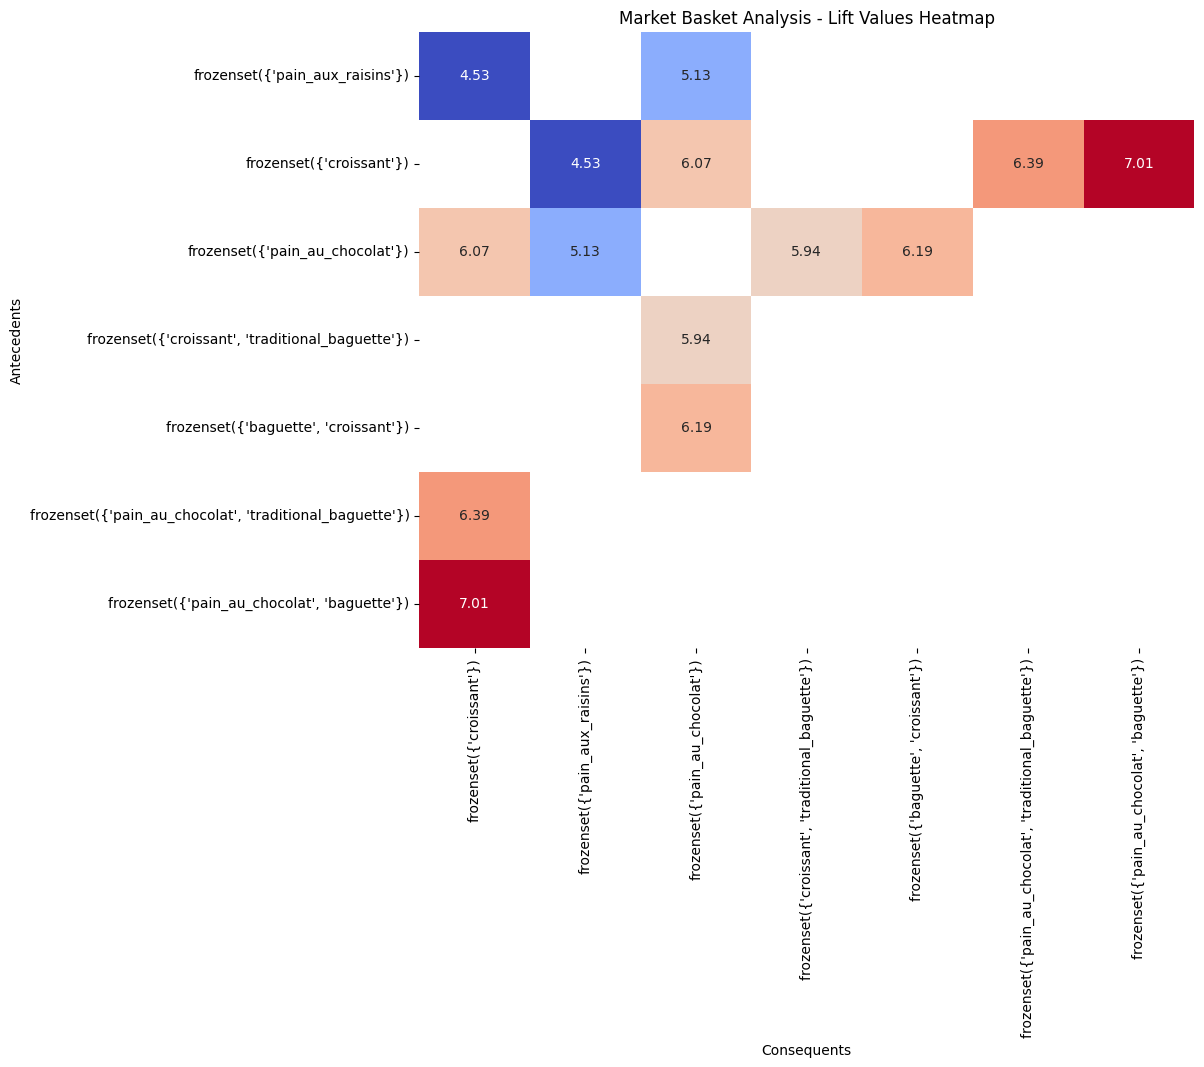

In [9]:
# Create a pivot table with 'antecedents' as index, 'consequents' as columns, and 'lift' as values
rules_pivot_table = rules.pivot(index='antecedents', columns='consequents', values='lift')

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rules_pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=False)
plt.title('Market Basket Analysis - Lift Values Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')

# Display the heatmap
plt.show()

# Analysis of Rules and HeatMap

In [10]:
# Here we can see that there are really interesting relationships between products, sometimes even between groups of them. The higher the lift
# the better/interesting the relationship. So if interested in upscaling sales we could create promotions, bundles, even lower prices, and eventually 
# provoke a rise in sales in products like 'croissant' and 'baguette, pain_au_chocolat', or 'croissant' and 'traditional_baguette, pain_au_chocolat', 
# or 'pain_au_chocolat' and 'croissant'. 

# Creating file with market_basket_analysis function and moving it to its respective folder

In [11]:
%%writefile mba_function.py

def market_basket_analysis(df: pd.DataFrame, transactions: str, items: str, min_support=0.1, metric="lift", min_threshold=1) -> tuple:
    """
    Apply Market Basket Analysis using the Apriori algorithm to a dataframe with transactions and items sold.

    Args:
        df (pd.DataFrame): Input dataframe.
        transactions (str): Name of the first column for analysis, the one with the transactions values.
        items (str): Name of the second column for analysis, the one with the items values.
        min_support (float): Minimum support threshold for frequent itemsets.
        metric (str): Evaluation metric for association rules.
        min_threshold (float): Minimum threshold for the evaluation metric.

    Returns:
        tuple: Tuple containing DataFrame of association rules and DataFrame of frequent itemsets.

    """
    # Group the DataFrame by "transactions" and "item" and calculate the count of each transaction
    grouped_df = df.groupby([transactions, items]).size().reset_index(name="count")

    # Pivot the DataFrame to have "transactions" as index and "items" as columns and sum the counts
    pivot_df = grouped_df.pivot_table(index=transactions, columns=items, values="count", aggfunc="sum", fill_value=0)

    # Encode the values to 1 if greater than 0 and 0 if less than or equal to 0
    def encode_units(x):
        if x <= 0:
            return 0
        if x >= 1:
            return 1

    basket_sets = pivot_df.applymap(encode_units)

    # Apply the Apriori algorithm to find frequent itemsets
    frequent_itemsets = apriori(basket_sets, min_support=min_support, use_colnames=True)

    # Add a column with the length of the itemsets
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

    # Generate association rules based on frequent itemsets
    rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)

    # Sort the rules by lift
    rules = rules.sort_values(by='lift', ignore_index=True)

    return rules, frequent_itemsets

Writing mba_function.py


In [12]:
!move = {config['functions']['source_path_a']} {config['functions']['destination_path_a']}

        1 file(s) moved.


# Creating files with the new dataframes to analyse visually later

In [13]:
rules.to_csv(config['data']['output']['mba_rules'])
frequent_itemsets.to_csv(config['data']['output']['mba_frequent_itemsets'])